In [1]:
%run init_notebook.py

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [3]:
from settings import WORK_DATA_DIR
from utils.load import load_data
from utils.utils import get_variance_inflation_factor, is_day, cut_to_weekly_data, tts_data
from utils.plotting import cross_corr, df_cross_corr, corr_heatmap

In [4]:
# Load data
data_len = 8055 # 440, 660, 760, 1560, 8055
week_day = 'daily'
predicted = "sp_close_lead1"

df_w = load_data(file_name=f"df_{week_day}_{data_len}.csv", file_path=WORK_DATA_DIR)
data_dict = load_data(file_name=f"dict_{week_day}_{data_len}.pkl", file_path=WORK_DATA_DIR)

relevant_cols = data_dict["data"]["relevant_cols"]
data_dict["model_features"]["predicted"] = predicted

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\2_work\\df_daily_8055.csv'

In [ ]:
if week_day == "weekly":
    df_w = cut_to_weekly_data(df_w, 'is_thu')

In [ ]:
df_w["is_day"] = is_day(df_w.date)
df_w["year"] = df_w.date.apply(lambda x: dt.datetime.strptime(str(x), '%Y-%m-%d').year)

In [ ]:
cols = [
    # 'vixo',
     # 'naaim_ind',
     # 'naaim_max',
     # 'naaim_q1',
     'ff_M_RF',
     'ff_SMB',
     'ff_HML',
     'ff_RMW',
     'ff_CMA',
     # 'termspread',
     # 'pc_ratio',
     # 'fears35',
     # 'aaii_Bullish',
     # 'aaii_Bearish',
     # 'aaii_Neutral',
     'sp_close',
     'sp_close_lag1',
     'sp_close_lag2',
     'sp_close_lag3',
     'sp_close_lag4',
     'sp_close_lag5',
     'sp_close_lag6',
     'sp_close_lag7',
     'sp_close_lag8',
     'sp_close_lag9',
     'sp_close_lag10',
     'is_day',
]


In [5]:
list1 = [1, 2, 3]
list2 = [1, 2, 3]
list3 = [1, 2, 3]

In [9]:
def is_num(x):
    if type(x) == float:
        return True
    elif type(x) == int:
        return True

In [10]:
for a, b, c in zip(list1, list2, list3):
    print(a)
    if (not (a and b and c)):
        raise 500

1
2
3


In [65]:
years_start = 2011
years_end = 2015
print(years_end - years_start + 1)

5


In [66]:
# df_ws = df_w[cols + [data_dict["model_features"]["predicted"], 'date']].copy()
df_ws = df_w.copy()
df_ws = df_ws[(df_ws["date"] >= dt.datetime(year=years_start, month=1, day=1).date())
             &(df_ws["date"] <= dt.datetime(year=years_end, month=12, day=31).date())]

In [67]:
df_ws.shape

(1258, 38)

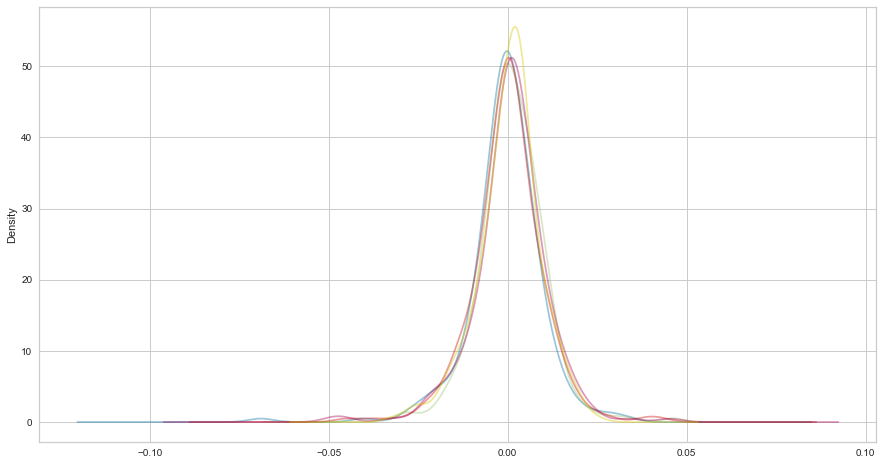

In [68]:
plt.figure(figsize=(15, 8))
df_ws.groupby('is_day')["sp_close"].plot.kde(alpha=.4);

year
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sp_close, dtype: object

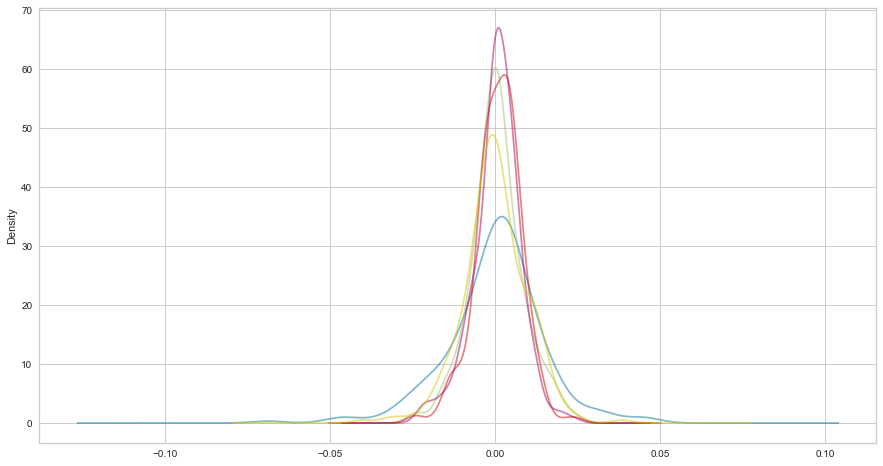

In [69]:
plt.figure(figsize=(15, 8))
df_ws.groupby("year").sp_close.plot.kde(alpha=.5)

In [70]:
X_train, X_test, y_train, y_test = tts_data(df_ws, y=data_dict["model_features"]["predicted"], x=cols)

In [71]:
X_train[data_dict["model_features"]["predicted"]] = y_train

In [72]:
# corr_heatmap(X_train, 
#              cols,
#              # size_factor=1,
#              show_fig=True)
get_variance_inflation_factor(X_train, cols, col_pred=data_dict["model_features"]["predicted"])

,VIF,corr_sp_close_lead1
sp_close_lag4,1.046970,-0.160649
ff_HML,1.875214,-0.110335
sp_close_lag2,1.049770,-0.104285
sp_close_lag8,1.048607,-0.080107
sp_close,562.703450,-0.046012
ff_M_RF,598.909610,-0.045938
ff_SMB,3.906001,-0.045245
sp_close_lag10,1.058614,-0.036319
ff_CMA,1.709688,-0.032151
sp_close_lag6,1.061513,-0.015882


In [73]:
# corr_heatmap(df_ws, 
#              cols,
#              # size_factor=1,
#              show_fig=True)
get_variance_inflation_factor(df_ws, cols, col_pred=data_dict["model_features"]["predicted"])

,VIF,corr_sp_close_lead1
sp_close_lag4,1.037695,-0.115558
sp_close_lag2,1.039195,-0.096234
ff_HML,1.794713,-0.067862
sp_close_lag8,1.028422,-0.049213
sp_close,551.036053,-0.042641
ff_M_RF,586.026673,-0.040678
ff_SMB,3.960941,-0.027577
sp_close_lag6,1.040609,-0.022609
sp_close_lag10,1.036167,-0.015211
sp_close_lag3,1.047736,-0.007658


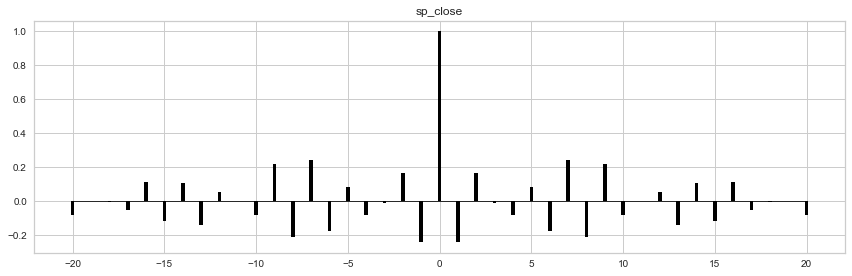

In [24]:
cross_corr(df_ws.sp_close, df_ws.sp_close, no_lags = 20, show_plot=True, figsize=(12, 4));

In [22]:
# find highest corr

In [ ]:
df_

In [30]:
df_w[cols].corrwith(df

,ff_M_RF,ff_SMB,ff_HML,ff_RMW,ff_CMA,sp_close,sp_close_lag1,sp_close_lag2,sp_close_lag3,sp_close_lag4,sp_close_lag5,sp_close_lag6,sp_close_lag7,sp_close_lag8,sp_close_lag9,sp_close_lag10,is_day
0,-0.76,0.95,-0.23,-0.09,0.02,-0.009880,0.011066,-0.008657,-0.024985,0.003507,-0.006629,-0.011857,0.004504,-0.009804,-0.008650,-0.002589,2
1,0.05,-0.60,-0.03,0.08,0.18,0.002339,-0.009880,0.011066,-0.008657,-0.024985,0.003507,-0.006629,-0.011857,0.004504,-0.009804,-0.008650,3
2,0.31,0.08,-0.02,-0.57,0.10,0.002835,0.002339,-0.009880,0.011066,-0.008657,-0.024985,0.003507,-0.006629,-0.011857,0.004504,-0.009804,4
3,-2.31,0.80,0.49,-0.16,0.15,-0.026199,0.002835,0.002339,-0.009880,0.011066,-0.008657,-0.024985,0.003507,-0.006629,-0.011857,0.004504,0
4,-0.07,-0.45,0.03,0.05,0.34,0.003716,-0.026199,0.002835,0.002339,-0.009880,0.011066,-0.008657,-0.024985,0.003507,-0.006629,-0.011857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,-0.65,1.44,-2.32,-1.69,-0.37,-0.010341,-0.008782,0.016216,-0.007499,-0.009178,0.009504,-0.007207,0.003081,0.020496,0.011663,-0.008484,4
8044,-1.27,-0.20,-0.40,0.03,0.16,-0.011453,-0.010341,-0.008782,0.016216,-0.007499,-0.009178,0.009504,-0.007207,0.003081,0.020496,0.011663,0
8045,2.06,0.67,0.19,-1.08,-0.20,0.017622,-0.011453,-0.010341,-0.008782,0.016216,-0.007499,-0.009178,0.009504,-0.007207,0.003081,0.020496,1
8046,0.97,0.18,-0.35,0.31,0.07,0.010129,0.017622,-0.011453,-0.010341,-0.008782,0.016216,-0.007499,-0.009178,0.009504,-0.007207,0.003081,2


In [57]:
2017 - 1990

27

In [62]:
df = pd.DataFrame()
for i in range(0, 27):
    df_ = df_w.copy()
    df_ = df_[(df_["date"] >= dt.datetime(year=(2017 - i), month=1, day=1).date())
             &(df_["date"] <= dt.datetime(year=(2021 - i), month=12, day=31).date())]
    
    df[f'corr_{2017 - i}_{2021 - i}'] = df_[cols].corrwith(df_.sp_close_lead1)

In [63]:
df.loc["corr_sum"] = df.(axis=0)

In [74]:
df

,corr_2017_2021,corr_2016_2020,corr_2015_2019,corr_2014_2018,corr_2013_2017,corr_2012_2016,corr_2011_2015,corr_2010_2014,corr_2009_2013,corr_2008_2012,...,corr_2000_2004,corr_1999_2003,corr_1998_2002,corr_1997_2001,corr_1996_2000,corr_1995_1999,corr_1994_1998,corr_1993_1997,corr_1992_1996,corr_1991_1995
ff_M_RF,-0.229664,-0.233689,-0.021442,-0.009279,-0.029361,-0.006851,-0.040678,-0.059840,-0.086945,-0.107595,...,-0.023513,-0.022592,-0.007705,-0.007576,-0.003432,0.002569,0.009490,0.029650,0.060516,0.034985
ff_SMB,0.045546,0.038575,0.002918,-0.005108,-0.030750,-0.009121,-0.027577,-0.015973,-0.034127,0.067223,...,0.003218,-0.015057,-0.002043,-0.014807,-0.036996,-0.004476,0.018577,-0.037657,-0.024692,0.023598
ff_HML,-0.038029,-0.047153,-0.039300,-0.034178,-0.023398,-0.019772,-0.067862,-0.049516,-0.072993,-0.067753,...,0.008180,0.001413,0.003765,0.026844,0.019964,-0.003882,-0.009986,-0.042219,-0.059758,-0.011058
ff_RMW,0.005679,0.015889,0.011686,0.025081,0.026834,-0.009556,0.026447,0.033420,0.064068,0.047427,...,0.027708,0.028769,0.019498,0.030615,0.058527,0.024431,0.009711,0.042770,0.065391,0.048299
ff_CMA,0.008188,0.014645,-0.026919,-0.019632,-0.007797,-0.001907,-0.005524,0.026549,0.013112,0.063703,...,-0.012791,-0.016270,-0.018058,-0.010560,-0.035529,-0.041044,-0.055529,-0.076799,-0.090628,-0.051771
sp_close,-0.240167,-0.242369,-0.021091,-0.008047,-0.027182,-0.006214,-0.042641,-0.063520,-0.088881,-0.115795,...,-0.020233,-0.018236,-0.005770,-0.005294,0.001546,-0.003936,-0.002938,0.018955,0.047947,0.016992
sp_close_lag1,0.166038,0.174164,-0.051277,-0.033889,-0.021190,-0.018443,0.037134,0.050764,0.040853,-0.067708,...,-0.045338,-0.025602,-0.029654,-0.049081,-0.037772,-0.008476,-0.023508,-0.032753,0.013875,0.019106
sp_close_lag2,-0.006454,-0.001271,0.017698,0.018841,-0.015190,-0.025809,-0.096234,-0.075313,-0.060209,0.042425,...,-0.014505,-0.038569,-0.037148,-0.033183,-0.060080,-0.060388,-0.024235,-0.049063,-0.063842,-0.043721
sp_close_lag3,-0.082971,-0.079458,-0.052267,-0.059177,-0.060603,-0.072842,-0.007658,0.022722,0.057662,-0.011875,...,0.016261,0.012248,0.008448,0.023116,0.008590,-0.014729,-0.008940,-0.043774,-0.037747,0.002939
sp_close_lag4,0.084236,0.088507,-0.031225,-0.014498,-0.019927,-0.039862,-0.115558,-0.111362,-0.071968,-0.056313,...,-0.031163,-0.051262,-0.038874,-0.057344,-0.050271,-0.071201,-0.045687,-0.043668,-0.051159,-0.014873


In [64]:
abs(df.loc['corr_sum']).sort_values()

corr_1991_1995    0.092005
corr_2004_2008    0.125277
corr_2001_2005    0.147713
corr_2006_2010    0.149235
corr_1997_2001    0.150673
corr_1994_1998    0.156100
corr_2005_2009    0.158661
corr_2000_2004    0.169550
corr_2008_2012    0.172234
corr_1998_2002    0.175939
corr_2007_2011    0.181462
corr_2010_2014    0.193178
corr_1993_1997    0.194705
corr_2012_2016    0.198657
corr_2003_2007    0.202145
corr_1996_2000    0.209594
corr_1995_1999    0.209636
corr_1999_2003    0.213685
corr_2014_2018    0.231321
corr_2002_2006    0.233294
corr_2013_2017    0.242541
corr_2015_2019    0.248913
corr_2009_2013    0.250990
corr_1992_1996    0.253926
corr_2016_2020    0.266768
corr_2017_2021    0.287409
corr_2011_2015    0.313368
Name: corr_sum, dtype: float64

In [33]:
pd.DataFrame(results)

,0,1
0,0,ff_M_RF -0.232270 ff_SMB 0...
1,1,ff_M_RF -0.248106 ff_SMB 0...
2,2,ff_M_RF -0.048240 ff_SMB 0...
3,3,ff_M_RF -0.010336 ff_SMB -0...
4,4,ff_M_RF -0.017398 ff_SMB -0...
5,5,ff_M_RF -0.022274 ff_SMB -0...
6,6,ff_M_RF 0.016818 ff_SMB -0...
7,7,ff_M_RF -0.063929 ff_SMB -0...
8,8,ff_M_RF -0.066176 ff_SMB -0...
9,9,ff_M_RF -0.086745 ff_SMB -0...
